In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("airlines.csv")
df.head(11)

,Airline ID,Nombre,Alias,Asociacion_Internacional_Transporte_Aereo,Organizacion_Aviacion_Civil_Internacional,Callsign,Ciudad,Activo
0,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
1,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y
2,13,Ansett Australia,\N,AN,AAA,ANSETT,Australia,Y
3,15,Abelag Aviation,\N,W9,AAB,ABG,Belgium,N
4,21,Aigle Azur,\N,ZI,AAF,AIGLE AZUR,France,Y
5,22,Aloha Airlines,\N,AQ,AAH,ALOHA,United States,Y
6,24,American Airlines,\N,AA,AAL,AMERICAN,United States,Y
7,28,Asiana Airlines,\N,OZ,AAR,ASIANA,Republic of Korea,Y
8,29,Askari Aviation,\N,4K,AAS,AL-AAS,Pakistan,Y
9,32,Afriqiyah Airways,\N,8U,AAW,AFRIQIYAH,Libya,Y


Informacion General

In [4]:
df.info

<bound method DataFrame.info of       Airline ID               Nombre              Alias  \
0              3        1Time Airline                 \N   
1             10          40-Mile Air                 \N   
2             13     Ansett Australia                 \N   
3             15      Abelag Aviation                 \N   
4             21           Aigle Azur                 \N   
...          ...                  ...                ...   
1005       19974    SOCHI AIR EXPRESS      ADLER EXPRESS   
1006       20285       WestJet Encore             Encore   
1007       20752  ATA Airlines (Iran)      هواپیمایی آتا   
1008       21131     All America BOPY   All America BOPY   
1009       21317        Svyaz Rossiya  Russian Commuter    

     Asociacion_Internacional_Transporte_Aereo  \
0                                           1T   
1                                           Q5   
2                                           AN   
3                                           W9 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline ID,1010.0,3540.049505,3846.666624,3.0,1365.5,2854.0,4326.5,21317.0


Buscar Valores Nulos

In [6]:
df.isnull().sum()

Airline ID                                   0
Nombre                                       0
Alias                                        0
Asociacion_Internacional_Transporte_Aereo    0
Organizacion_Aviacion_Civil_Internacional    0
Callsign                                     0
Ciudad                                       0
Activo                                       0
dtype: int64

In [7]:
df.isnull().sum()/len(df) * 100

Airline ID                                   0.0
Nombre                                       0.0
Alias                                        0.0
Asociacion_Internacional_Transporte_Aereo    0.0
Organizacion_Aviacion_Civil_Internacional    0.0
Callsign                                     0.0
Ciudad                                       0.0
Activo                                       0.0
dtype: float64

Eliminar Duplicados

In [8]:
print("Duplicados Antes", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicados Después", df.duplicated().sum())


Duplicados Antes 0
Duplicados Después 0


In [9]:
df.to_csv('Airlines.csv', index=False)

In [10]:
print(df.shape)

(1010, 8)


In [11]:
df.describe(include="object").T

,count,unique,top,freq
Nombre,1010,1005,Aeromar,2
Alias,1010,91,\N,920
Asociacion_Internacional_Transporte_Aereo,1010,860,1I,4
Organizacion_Aviacion_Civil_Internacional,1010,994,\N,7
Callsign,1010,999,Rainbow Air,3
Ciudad,1010,184,United States,148
Activo,1010,3,Y,661


In [12]:
print(df['Ciudad'].value_counts())

Ciudad
United States           148
Russia                   63
Canada                   33
United Kingdom           30
Germany                  28
                       ... 
Angola                    1
Zambia                    1
Maldives                  1
Puerto Rico               1
Netherlands Antilles      1
Name: count, Length: 184, dtype: int64


In [13]:
print(df['Nombre'].value_counts())

Nombre
Aeromar                 2
Tyrolean Airways        2
Comair                  2
Sky Express             2
Thomas Cook Airlines    2
                       ..
SOCHI AIR EXPRESS       1
WestJet Encore          1
ATA Airlines (Iran)     1
All America BOPY        1
1Time Airline           1
Name: count, Length: 1005, dtype: int64


Detectarb columnas numericas y categorias

In [14]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Columnas Numéricas:", list(numeric_cols))
print("Columnas Categóricas:", list(categorical_cols))

Columnas Numéricas: ['Airline ID']
Columnas Categóricas: ['Nombre', 'Alias', 'Asociacion_Internacional_Transporte_Aereo', 'Organizacion_Aviacion_Civil_Internacional', 'Callsign', 'Ciudad', 'Activo']


conversion de fechas

In [15]:
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

    df.head()

Eliminar nulos

In [16]:
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airline ID                                 1010 non-null   int64 
 1   Nombre                                     1010 non-null   object
 2   Alias                                      1010 non-null   object
 3   Asociacion_Internacional_Transporte_Aereo  1010 non-null   object
 4   Organizacion_Aviacion_Civil_Internacional  1010 non-null   object
 5   Callsign                                   1010 non-null   object
 6   Ciudad                                     1010 non-null   object
 7   Activo                                     1010 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.3+ KB


In [17]:
df.info()
df.rename(columns={"Airline_ID":"Aerolinea","Name":"Nombre","Alias":"Alias","IATA":"Asociacion_Internacional_Transporte_Aereo","ICAO":"Organizacion_Aviacion_Civil_Internacional","Callsing":"llamada","Country":"Ciudad","Active":"Activo"},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airline ID                                 1010 non-null   int64 
 1   Nombre                                     1010 non-null   object
 2   Alias                                      1010 non-null   object
 3   Asociacion_Internacional_Transporte_Aereo  1010 non-null   object
 4   Organizacion_Aviacion_Civil_Internacional  1010 non-null   object
 5   Callsign                                   1010 non-null   object
 6   Ciudad                                     1010 non-null   object
 7   Activo                                     1010 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.3+ KB


In [18]:
df['Alias'].unique()

array(['\\N', 'ANA All Nippon Airways', 'Air Asia',
       'Pulkovo Aviation Enterprise', 'bmi British Midland',
       'SN Brussels Airlines', 'Contactair', 'CSA Czech Airlines',
       'Emirates Airlines', 'EasyJet Airline', 'FlyAsianXpress', 'TACA',
       'Horizon Airlines', 'JAL Japan Airlines', 'Pacific Airlines',
       'PIA Pakistan International', 'Qantas Airways',
       'SAA South African Airways', 'SAS Scandinavian Airlines',
       'Sibir Airlines', 'SkyWork', 'Swiss Airlines', 'TAP Air Portugal',
       'Thai Air Asia', 'Turkmenhovayollary', 'TWA', 'Varig',
       'SkyExpress', 'now Jetairlfy', 'Braathens SAFE', 'Avialinii 400',
       'Epic Holidays', 'SZA', 'Dennis Sky Holding', 'WEA',
       'PAWA Dominicana', 'BRAZIL AIR', 'Kreta Sky', 'SOCHI',
       "Tom\\\\'s air", 'slowbird', 'lionXpress', 'Domenican',
       'Russian. Yours Air Lines ', 'Baikal Airlines', 'MARYSYA AIRLINES',
       'ZABAIKAL ', 'Fly Brasil', 'Himalaya', 'Indya1',
       'Air Canada Express', 'TUR

In [19]:
df.columns = df.columns.str.lower()

In [20]:
df.columns = df.columns.str.replace(" ", "_")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   airline_id                                 1010 non-null   int64 
 1   nombre                                     1010 non-null   object
 2   alias                                      1010 non-null   object
 3   asociacion_internacional_transporte_aereo  1010 non-null   object
 4   organizacion_aviacion_civil_internacional  1010 non-null   object
 5   callsign                                   1010 non-null   object
 6   ciudad                                     1010 non-null   object
 7   activo                                     1010 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.3+ KB


In [23]:
df["activo"].head(2)


0    Y
1    Y
Name: activo, dtype: object

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\paola\AppData\Local\Temp\ipykernel_9368\2525437477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["ciudad"].head(20).value_counts().index, y=df["ciudad"].head(20).value_counts().values,palette="viridis")


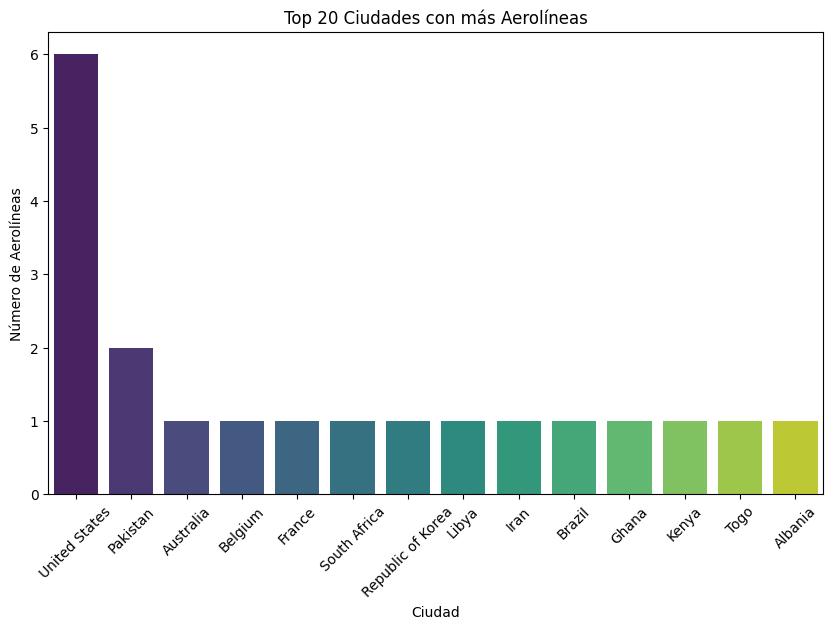

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["ciudad"].head(20).value_counts().index, y=df["ciudad"].head(20).value_counts().values,palette="viridis")
plt.title("Top 20 Ciudades con más Aerolíneas")
plt.xlabel("Ciudad")
plt.ylabel("Número de Aerolíneas")
plt.xticks(rotation=45)
plt.show()
